In [1]:
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

from mpl_toolkits.mplot3d import Axes3D  

import sys
sys.path.insert(0,'..')
from BMR.ml_models import *

plt.rcParams['figure.figsize'] = [30, 6]

# set seed
random.seed(1234)

# TODO: should we use StatsModels instead of sklearn?
#import statsmodels.api as sm

In [2]:
# fit linear model
def fit_lm(x, y):
    reg = LinearRegression().fit(x, y)
    reg_pred = reg.predict(x)
    r2 = r2_score(y, reg_pred)
    mse = mean_squared_error(y, reg_pred)
    return {'r2': r2, 'mse': mse, 'model': reg}

def fit_bmr(x, y, epsilon):
    bmr = BMR(min_n_pts=10, M=10, substitution_policy='nearest', degree=1, epsilon=epsilon)
    bmr.fit(x, y)
    bmr_pred = bmr.predict(x)
    r2 = r2_score(y, bmr_pred)
    mse = mean_squared_error(y, bmr_pred)
    return {'r2': r2, 'mse': mse, 'model': bmr}

def make_plot(x, y, mesh_X, mesh_Y, true_z, epsilons, title=''):

    colors = ['blue', 'green', 'orange', 'magenta']
    colors = colors[:len(epsilons)]

    out_lm  = fit_lm(x, y)

    fig = plt.figure()
    mesh = np.array([np.ravel(mesh_X), np.ravel(mesh_Y)]).transpose()
    subplot_id = 0
    for epsilon, color in zip(epsilons, colors):
        subplot_id += 1
        ax = fig.add_subplot(1, len(epsilons)+1, subplot_id, projection='3d')
        # true model
        ax.plot_wireframe(mesh_X, mesh_Y, true_z, color='black', label='True model')
        # linear model
        z = out_lm['model'].predict(mesh).reshape(mesh_X.shape)
        ax.plot_wireframe(mesh_X, mesh_Y, z, color='red', label=f'Linear Model R2={out_lm["r2"]:.4f}, MSE={out_lm["mse"]:.4f}')
        # plot bmlr
        out_bmr = fit_bmr(x, y, epsilon=epsilon)
        z = out_bmr['model'].predict(mesh).reshape(mesh_X.shape)
        ax.plot_wireframe(mesh_X, mesh_Y, z, color=color, label=f'BMR eps={epsilon:.2f}, R2={out_bmr["r2"]:.4f}, MSE={out_bmr["mse"]:.4f}')
        # data points
        ax.scatter3D(x[:, 0], x[:, 1], y, color='black')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        ax.legend()
    fig.suptitle(title)
    plt.show()

# Increasing noise in 2d

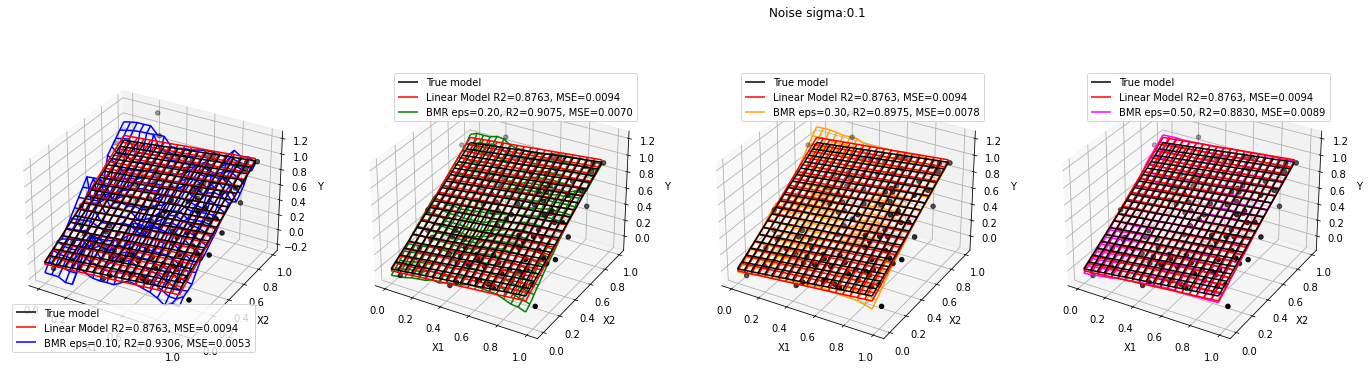

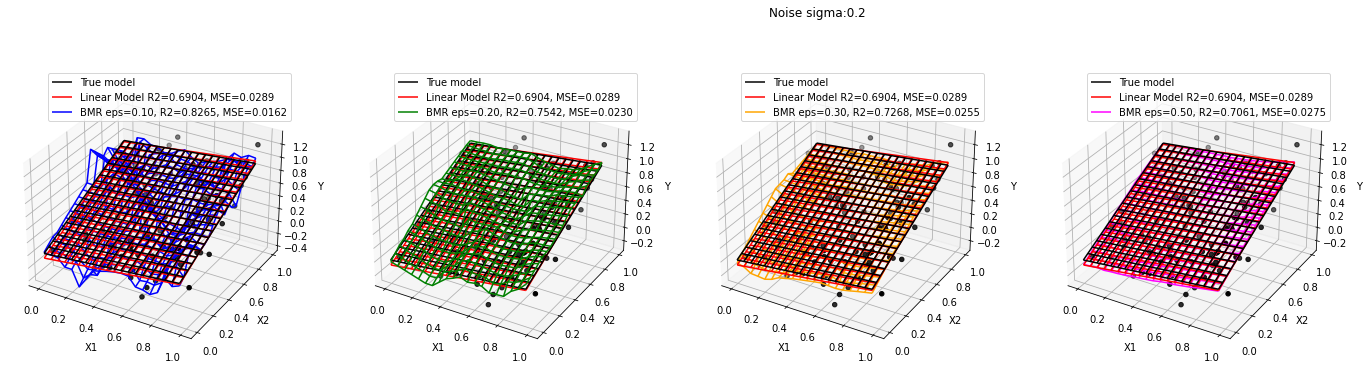

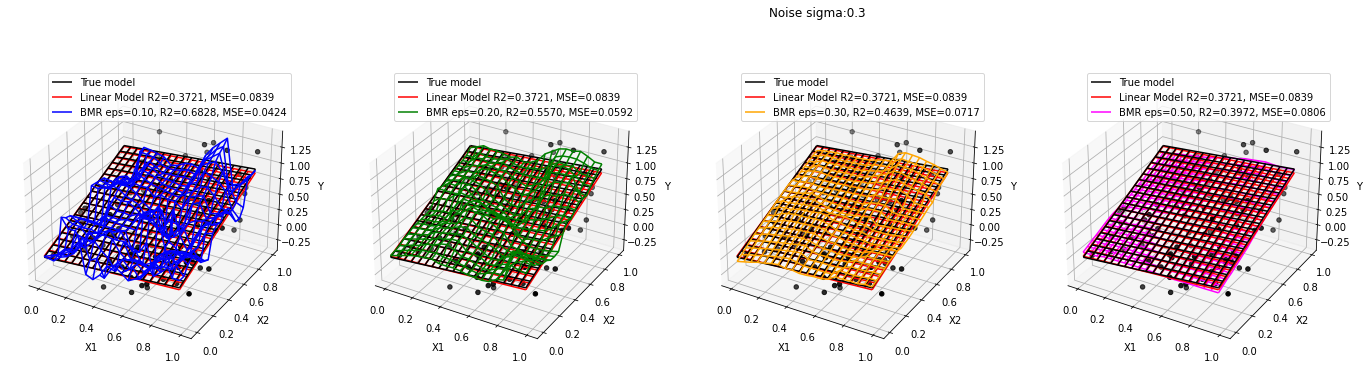

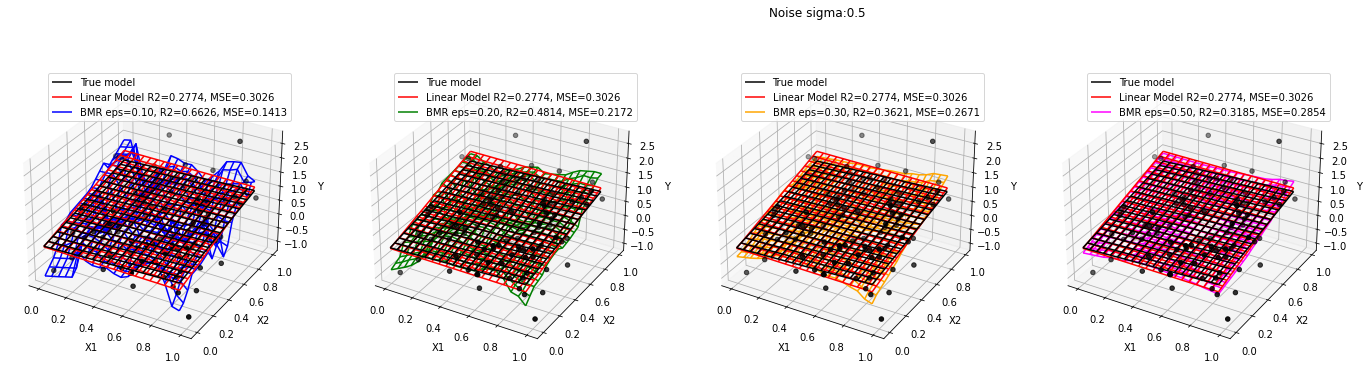

In [4]:
n_pts = 100
unif = ss.uniform()

grid_points = np.arange(0, 1.0, 0.05)
mesh_X, mesh_Y = np.meshgrid(grid_points, grid_points)

# true_model
true_z = np.array([np.ravel(mesh_X)*0.2+np.ravel(mesh_Y)*0.8]).reshape(mesh_X.shape)

x = unif.rvs(size=(n_pts, 2))

for sigma in [0.1, 0.2, 0.3, 0.5]:
    y = 0.2*x[:, 0] + 0.8*x[:, 1]
    norm = ss.norm(scale=sigma)
    # add noise
    y += norm.rvs(n_pts)
    make_plot(x, y, mesh_X, mesh_Y, true_z=true_z, epsilons=[0.1, 0.2, 0.3, 0.5], title=f'Noise sigma:{sigma}')

# Increasing non-linearity
y = 0.2*x1^power + 0.8*x2^power

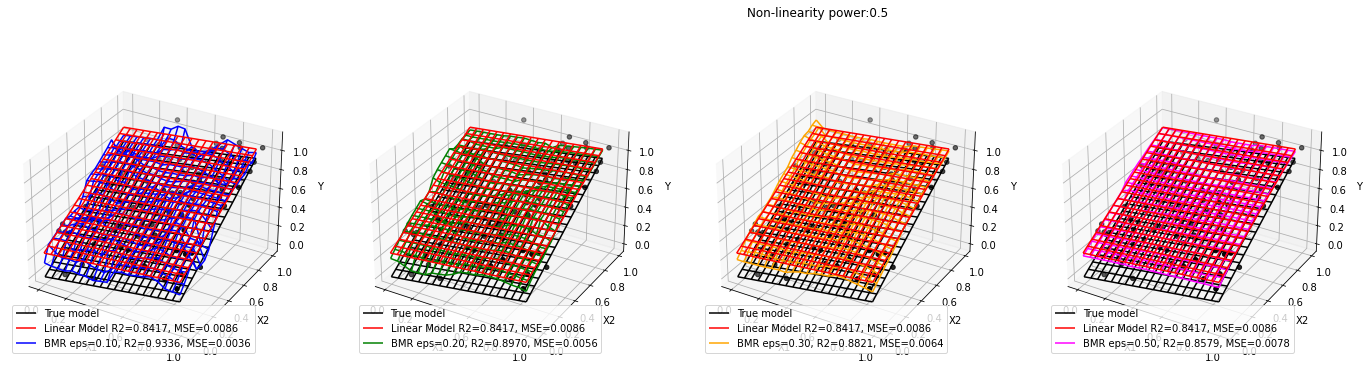

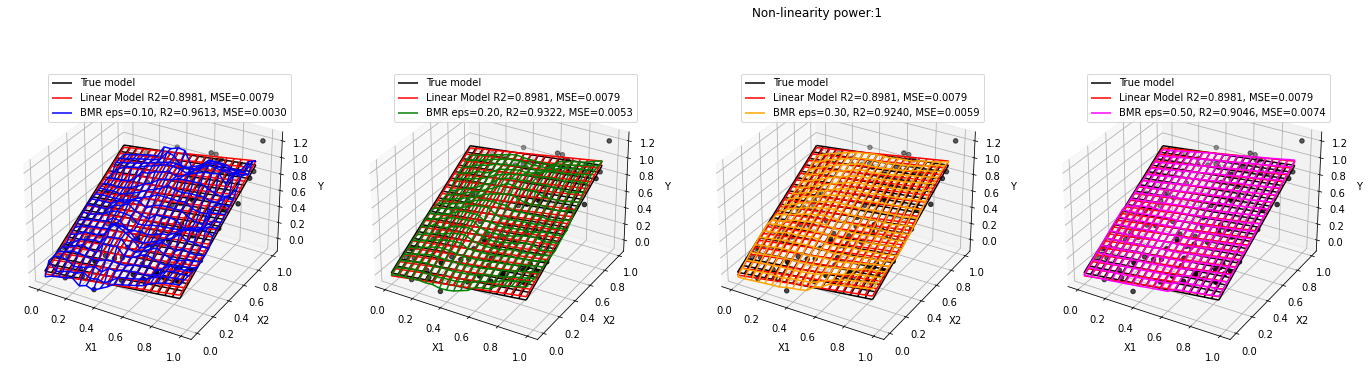

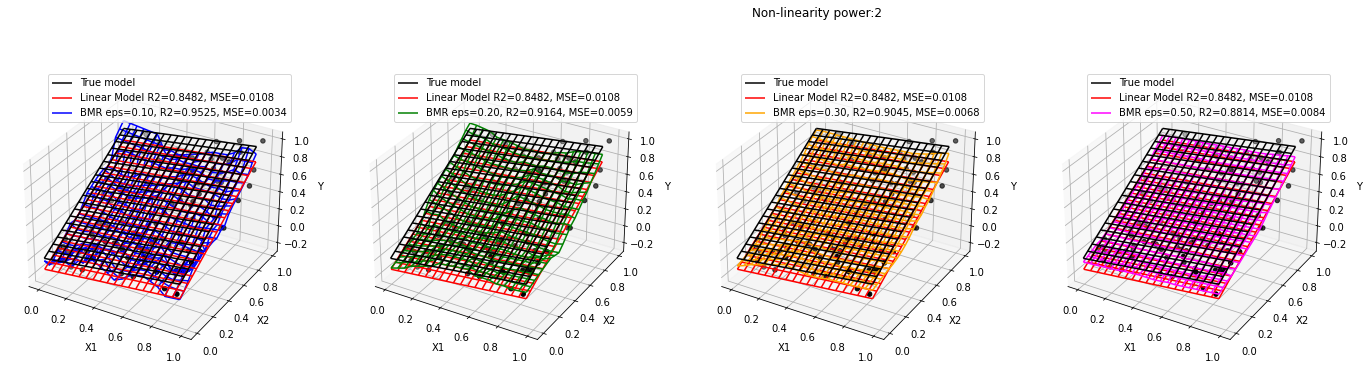

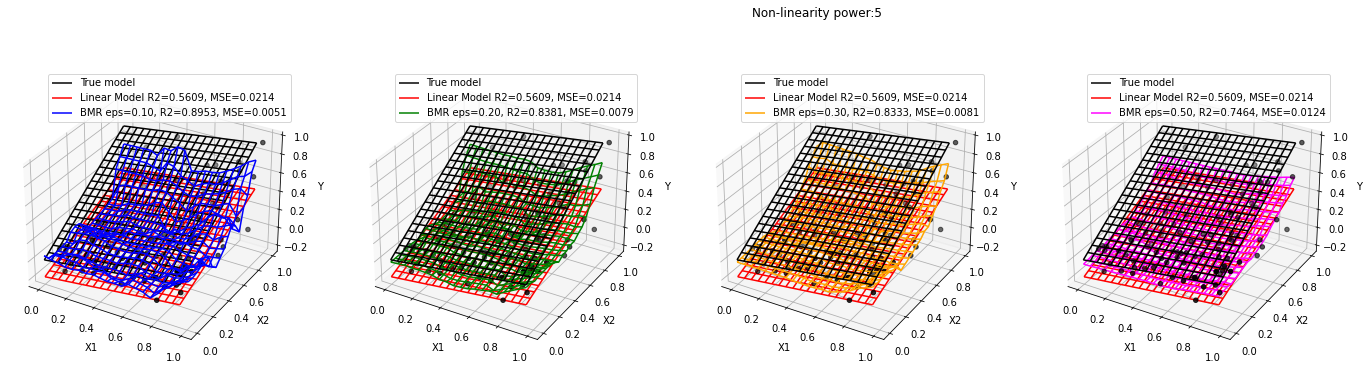

In [5]:
n_pts = 100
norm = ss.norm(scale=0.1)
unif = ss.uniform()

grid_points = np.arange(0, 1.0, 0.05)
mesh_X, mesh_Y = np.meshgrid(grid_points, grid_points)

# true_model
true_z = np.array([np.ravel(mesh_X)*0.2+np.ravel(mesh_Y)*0.8]).reshape(mesh_X.shape)

x = unif.rvs(size=(n_pts, 2))

for power in [0.5, 1, 2, 5]:
    y = 0.2*x[:, 0]**power + 0.8*x[:, 1]**power
    # add noise
    y += norm.rvs(n_pts)
    make_plot(x, y, mesh_X, mesh_Y, true_z=true_z, epsilons=[0.1, 0.2, 0.3, 0.5], title=f'Non-linearity power:{power}')
